In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression


%matplotlib inline 

In [2]:
df = pd.read_csv("C:/HOCDATA/housing.csv")
df.shape

(20640, 10)

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
#find null:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [7]:
# only total_bedrooms has Null that need to clean
df["total_bedrooms"].describe()

count    20433.000000
mean       537.870553
std        421.385070
min          1.000000
25%        296.000000
50%        435.000000
75%        647.000000
max       6445.000000
Name: total_bedrooms, dtype: float64

In [8]:
#because this is for housing so we should use the mean to replace NaN values - house shouldn't have 0 or only 1 bedrooms
df["total_bedrooms"] = df["total_bedrooms"].replace(np.nan , df["total_bedrooms"].mean())

In [9]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000346D45B0>,
      dtype=object)

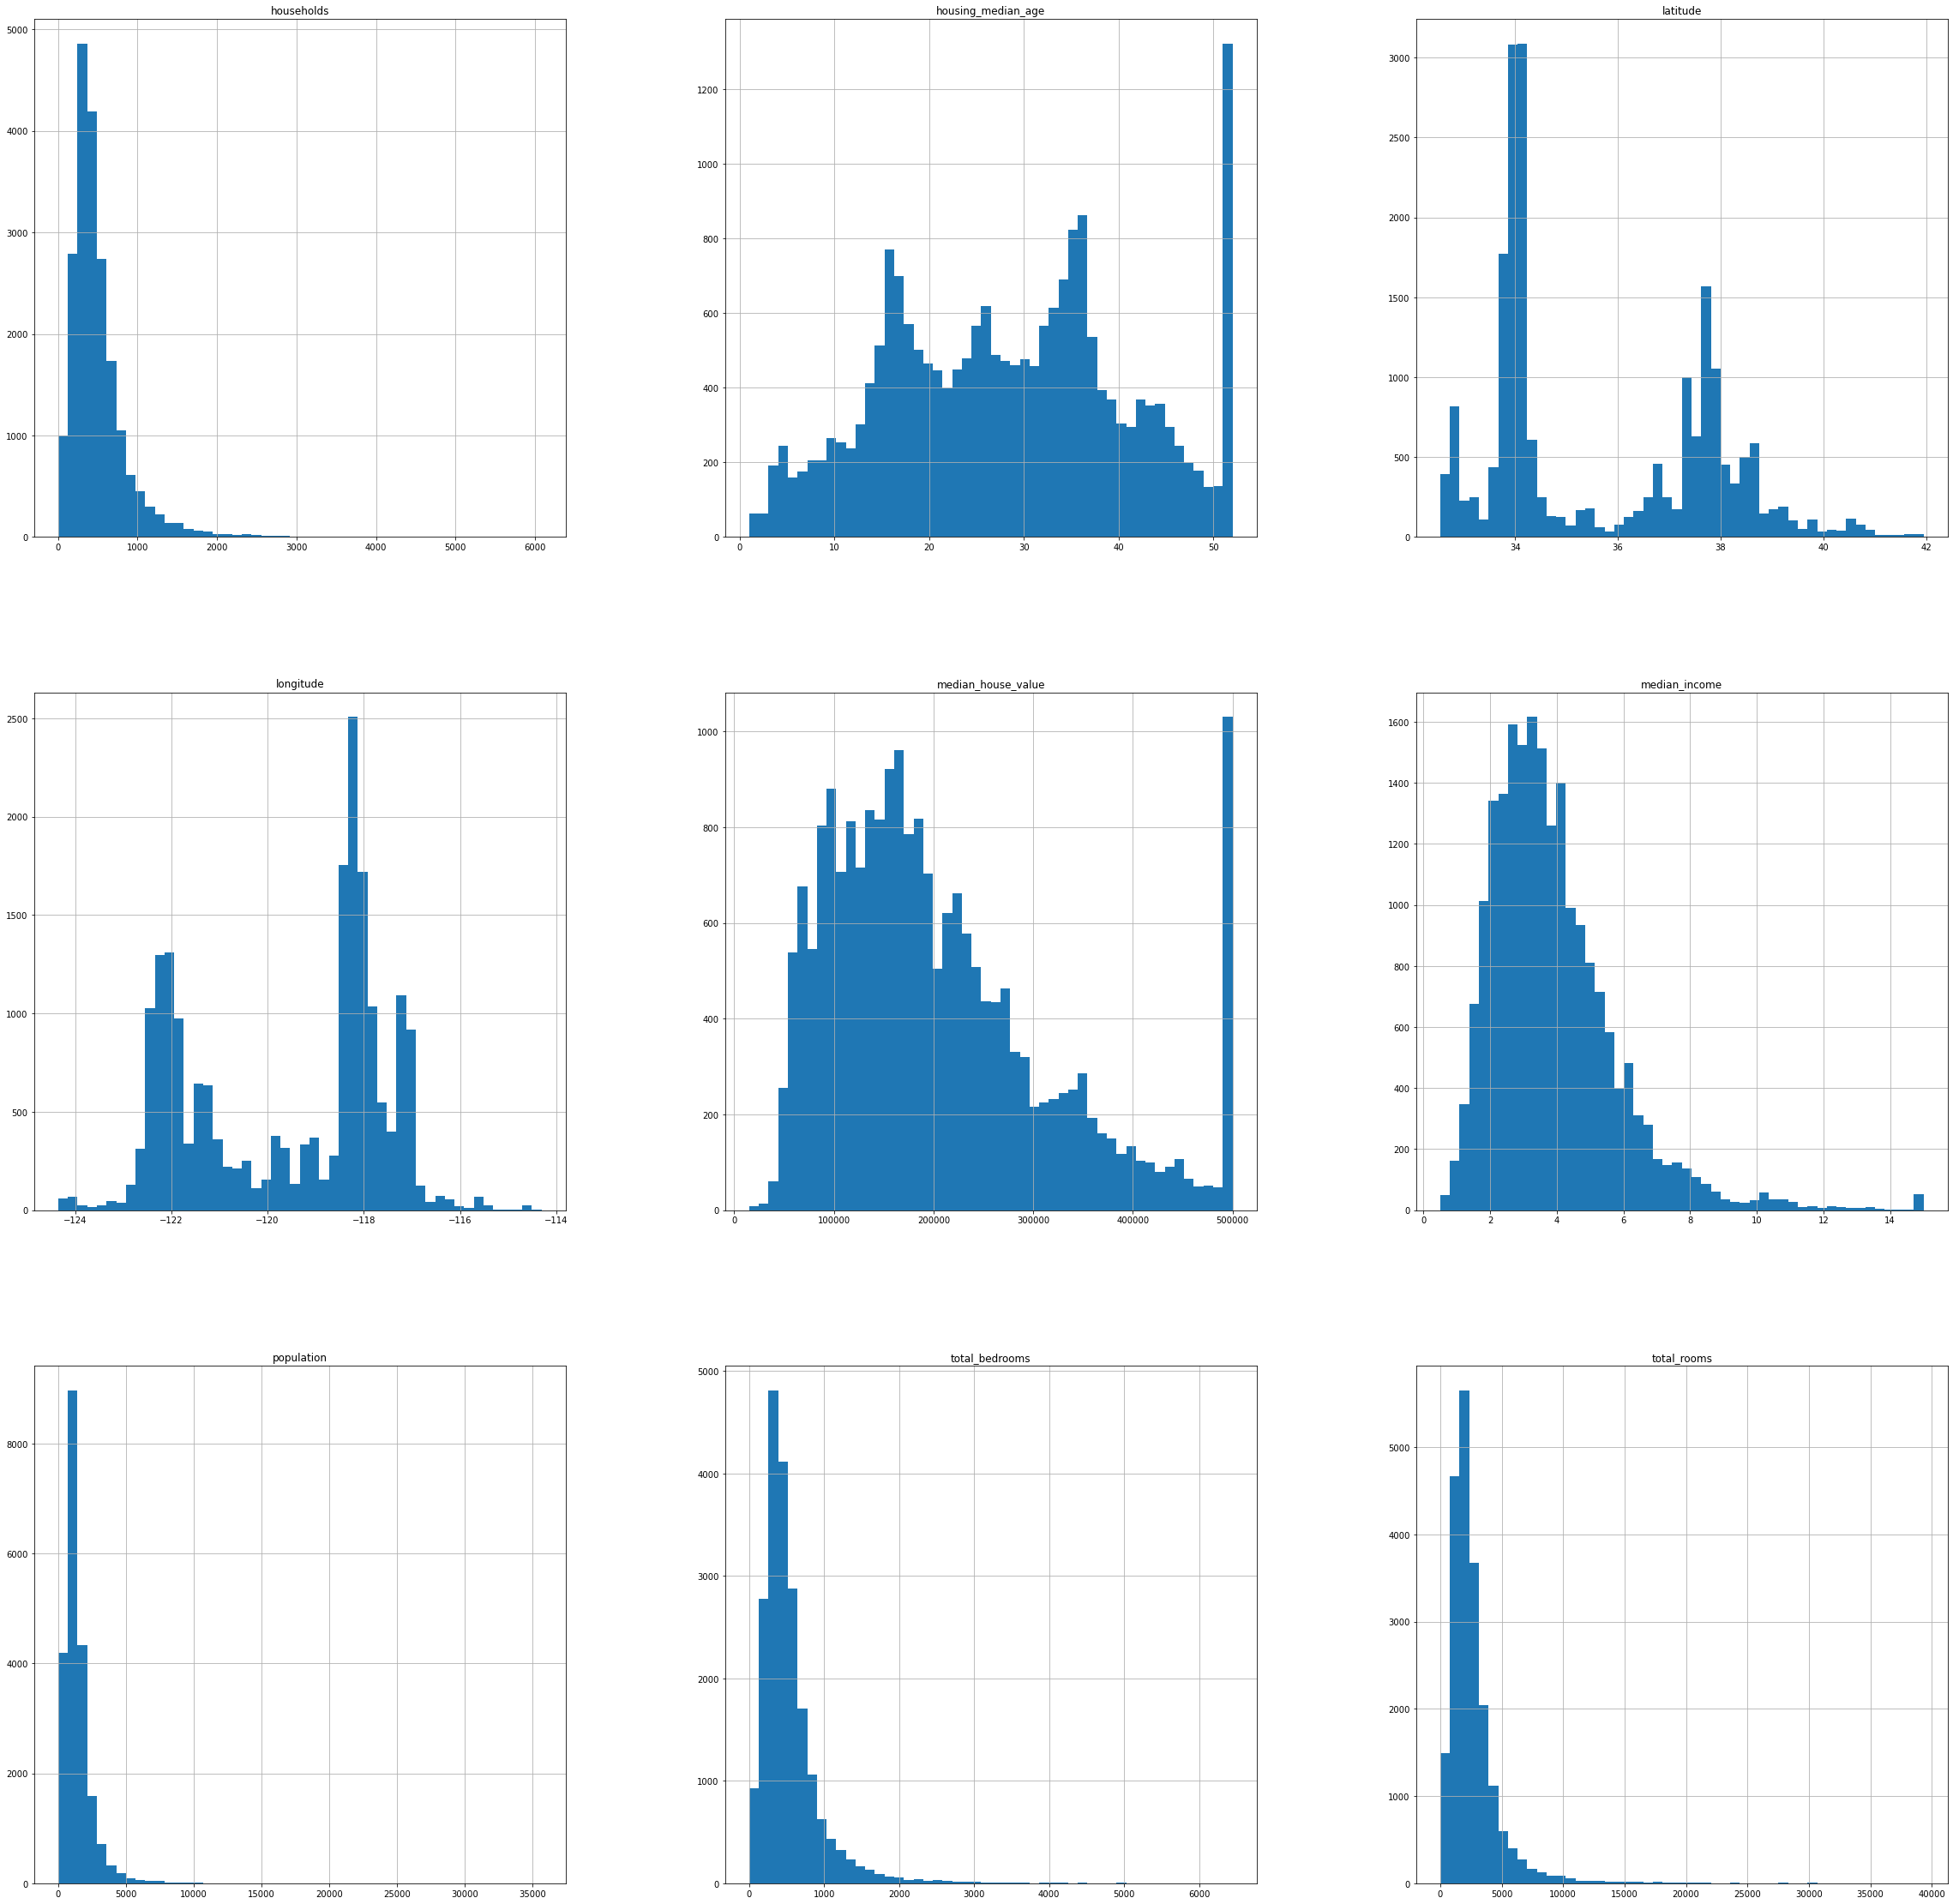

In [10]:
df.hist(bins = 50, figsize= (40,40))

In [11]:
#Find out correlation

df.corr()["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049454
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

In [12]:
label_encoder = LabelEncoder()
df['ocean_proximity'] = label_encoder.fit_transform(df['ocean_proximity'])

In [13]:
 #Base on the report, median_income, total rooms and median house age are the highest correlated to the median house value

In [14]:
#Now we need to take out outliers number

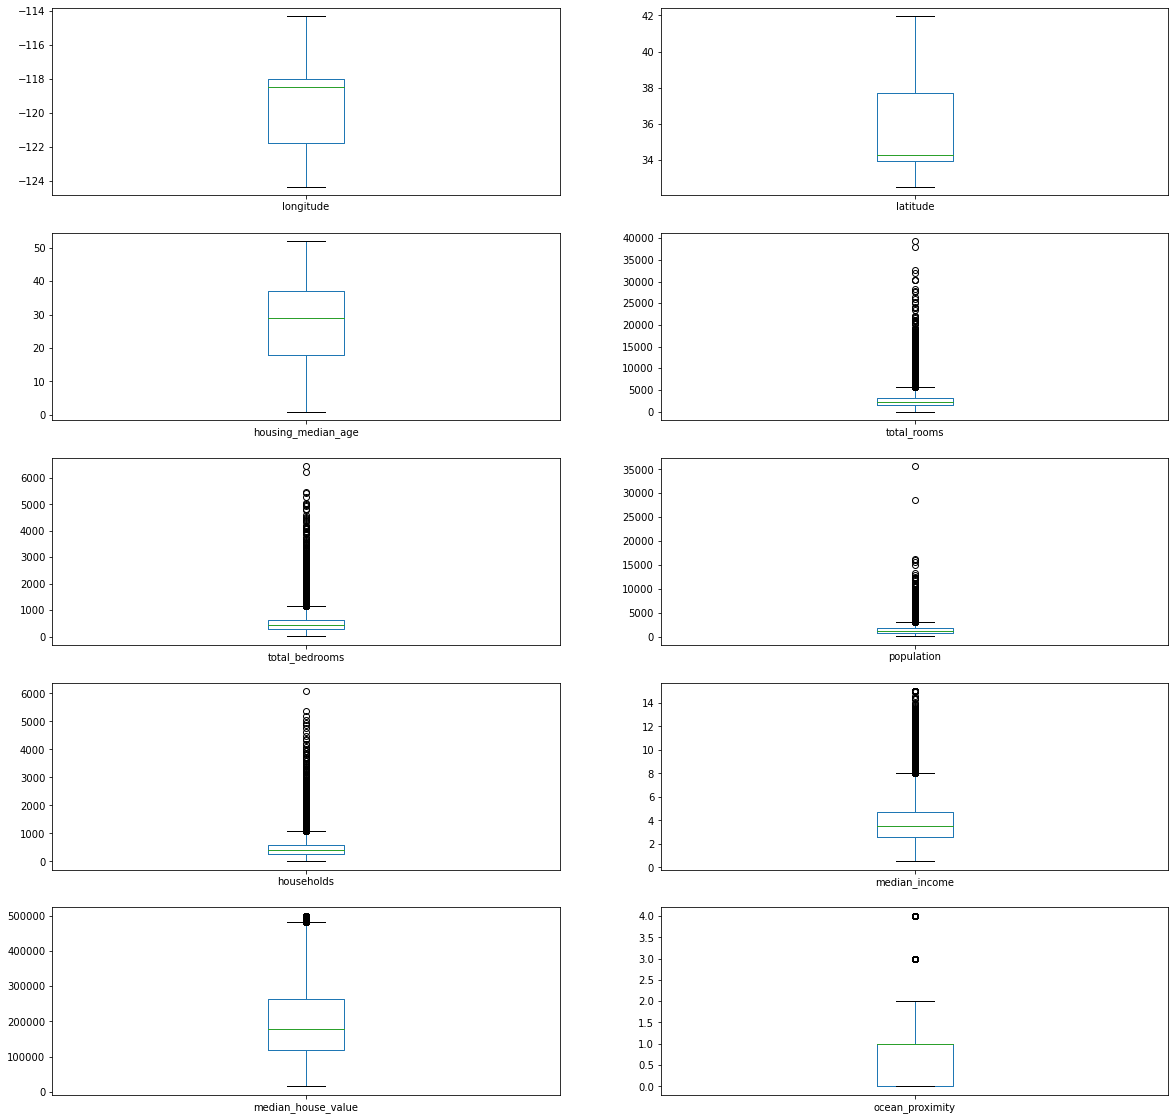

In [15]:
df.plot(kind = "box" , subplots = True , figsize = (20, 20), layout = (5, 2) )
plt.show()

In [16]:
df_final =  df.copy()

In [17]:
firstQ = df['total_bedrooms'].quantile(0.25)
thirdQ = df['total_bedrooms'].quantile(0.75)
IQR = thirdQ - firstQ
IQR

346.25

In [18]:
total_bedrooms_quantile = thirdQ + 3*(IQR)
df_final.drop(df_final[df_final['total_bedrooms']>total_bedrooms_quantile].index, axis = 0, inplace =True)

In [19]:
firstQ_P = df['population'].quantile(0.25)
thirdQ_P = df['population'].quantile(0.75)
IQR = thirdQ_P - firstQ_P
IQR

938.0

In [20]:
population_quantile = thirdQ_P + 3*(IQR)
df_final.drop(df_final[df_final['population']>population_quantile].index, axis = 0, inplace =True)

In [21]:
firstQ_H = df['households'].quantile(0.25)
thirdQ_H = df['households'].quantile(0.75)
IQR = thirdQ_H - firstQ_H
IQR

325.0

In [22]:
households_quantile = thirdQ_H + 3*(IQR)
df_final.drop(df_final[df_final['households']>households_quantile].index, axis = 0, inplace =True)

In [23]:
firstQ_T = df['total_rooms'].quantile(0.25)
thirdQ_T = df['total_rooms'].quantile(0.75)
IQR = thirdQ_T - firstQ_T
IQR

1700.25

In [24]:
total_rooms_quantile = thirdQ_T + 3*(IQR)
df_final.drop(df_final[df_final['total_rooms']>total_rooms_quantile].index, axis = 0, inplace =True)

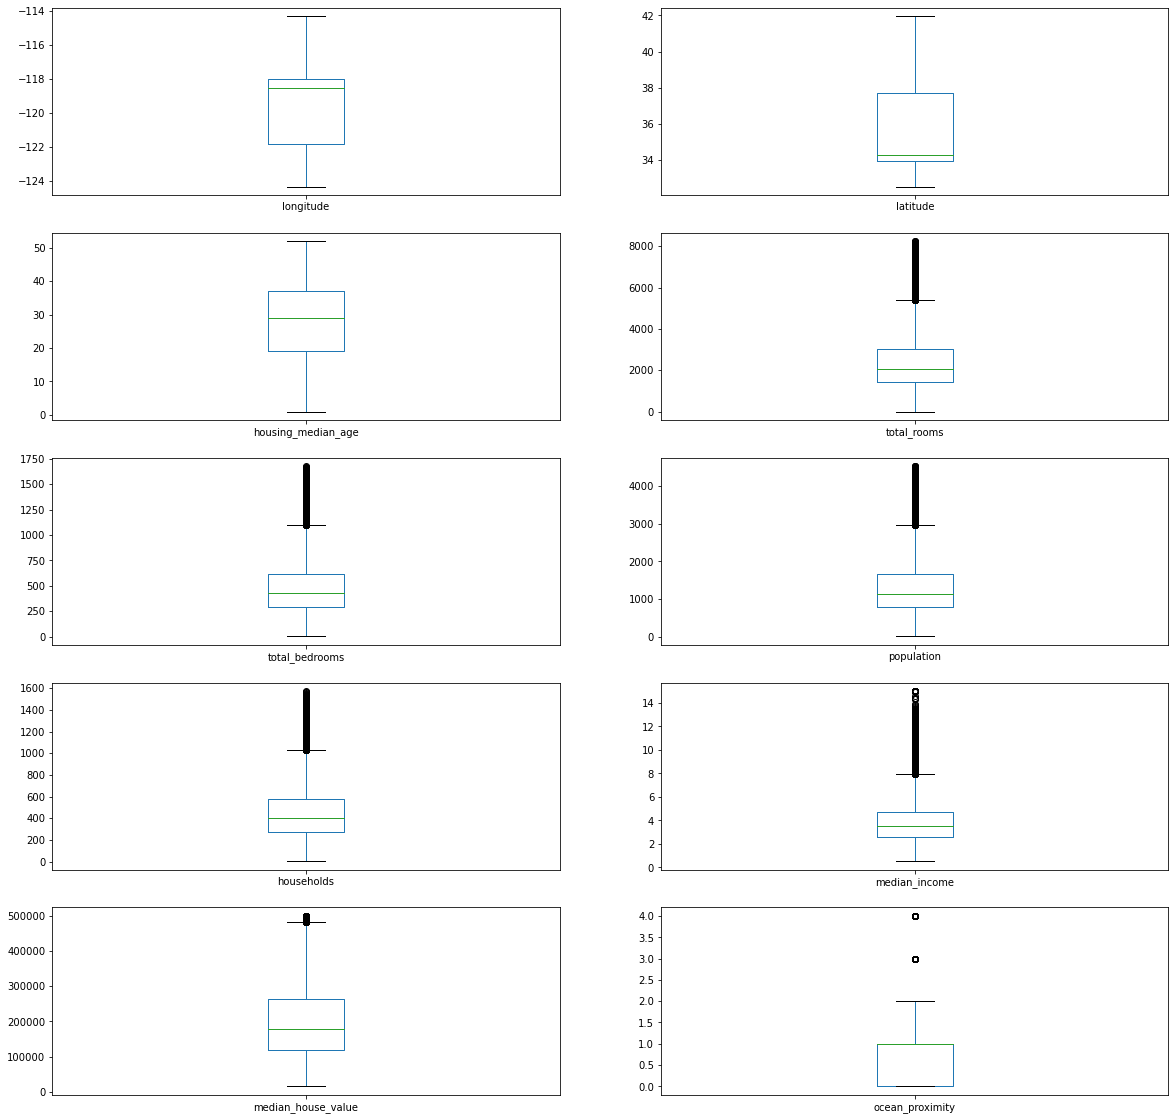

In [25]:
df_final.plot(kind = "box" , subplots = True , figsize = (20, 20), layout = (5, 2) )
plt.show()

In [27]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19943 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           19943 non-null  float64
 1   latitude            19943 non-null  float64
 2   housing_median_age  19943 non-null  float64
 3   total_rooms         19943 non-null  float64
 4   total_bedrooms      19943 non-null  float64
 5   population          19943 non-null  float64
 6   households          19943 non-null  float64
 7   median_income       19943 non-null  float64
 8   median_house_value  19943 non-null  float64
 9   ocean_proximity     19943 non-null  int32  
dtypes: float64(9), int32(1)
memory usage: 1.6 MB


In [28]:
from sklearn.model_selection import train_test_split

X = df_final.drop("median_house_value" , axis = 1).values
y = df_final['median_house_value'].values

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.25 , random_state=42)

In [29]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler ()
X_train = scale.fit_transform(X_train)
X_test = scale.fit_transform(X_test)

In [30]:
lr = LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_train,y_train)
lr.score(X_test,y_test)

0.6554078471995808

In [31]:
#Original data
X = df.drop("median_house_value" , axis = 1).values
y = df['median_house_value'].values

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.25 , random_state=42)

In [32]:
scale = StandardScaler ()
X_train = scale.fit_transform(X_train)
X_test = scale.fit_transform(X_test)

In [35]:
lr = LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_train,y_train)
lr.score(X_test,y_test)


0.626568746117129

In [36]:
import statsmodels.api as sm
from scipy import stats
X2 = sm.add_constant(X)
est = sm.OLS(y,X2)
est2 = est.fit()
est2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     3999.
Date:                Tue, 30 Nov 2021   Prob (F-statistic):               0.00
Time:                        03:52:25   Log-Likelihood:            -2.5945e+05
No. Observations:               20640   AIC:                         5.189e+05
Df Residuals:                   20630   BIC:                         5.190e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.568e+06   6.55e+04    -54.430      0.000    -3.7e+06   -3.44e+06
x1         -4.258e+04    743.628    -57.263      0.000    -4.4e+04   -4.11e+04
x2         -4.245e+04    688.464    -61.664      0.000   -4.38e+04   -4.11e+04
x3          1144.1920     43.263     26.447      0.000    1059.393    1228.991
x4            -6.6922      0.777     -8.609      0.000      -8.216      -5.169
x5            82.4428      6.049     13.630      0.000      70.587      94.298
x6           -39.8113      1.078    -36.927      0.000     -41.924     -37.698
x7            78.1369      6.786     11.515      0.000      64.837      91.437
x8          3.978e+04    333.461    119.287      0.000    3.91e+04    4.04e+04
x9            69.6668    367.517      0.190      0.850    -650.696     790.029
==============================================================================
Omnibus:                     5037.491   Durbin-Watson:                   0.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18953.000
Skew:                           1.184   Prob(JB):                         0.00
Kurtosis:                       7.054   Cond. No.                     5.33e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.33e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""